In [1]:
! git clone https://github.com/ZenoMK/L65_JohnPoole_ZenoKujawa.git

Cloning into 'L65_JohnPoole_ZenoKujawa'...
remote: Enumerating objects: 1458, done.
remote: Counting objects: 100% (1036/1036), done.
remote: Compressing objects: 100% (376/376), done.
remote: Total 1458 (delta 785), reused 868 (delta 657), pack-reused 422
Receiving objects: 100% (1458/1458), 410.84 KiB | 6.32 MiB/s, done.
Resolving deltas: 100% (1023/1023), done.


In [2]:
! cd L65_JohnPoole_ZenoKujawa/L65_JohnPoole_ZenoKujawa

/bin/bash: line 0: cd: L65_JohnPoole_ZenoKujawa/L65_JohnPoole_ZenoKujawa: No such file or directory


In [3]:
! pip install dm-haiku
! pip install graphlib
! pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for graphlib: filename=graphlib-0.9.5-py3-none-any.whl size=9634 sha256=b2ead602c7eddb49d18788a8b583c7c3c4d966af1031b029d04cd86606ec18bd
  Stored in directory: /root/.cache/pip/wheels/6e/97/aa/4d1b8530b8c0b43503611459bfaf81e7e90f8963bd761abcbd
Successfully built graphlib


In [4]:
%cd L65_JohnPoole_ZenoKujawa/

/kaggle/working/L65_JohnPoole_ZenoKujawa


# Run Command

In [5]:
!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename first32 --test_length 32
!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename second32 --test_length 32
!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename third32 --test_length 32

2024-03-13 14:36:33.473644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 14:36:33.473776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 14:36:33.614788: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0313 14:36:51.372470 132696537286464 xla_bridge.py:660] Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
I0313 14:36:51.375113 132696537286464 xla_bridge.py:660] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file:

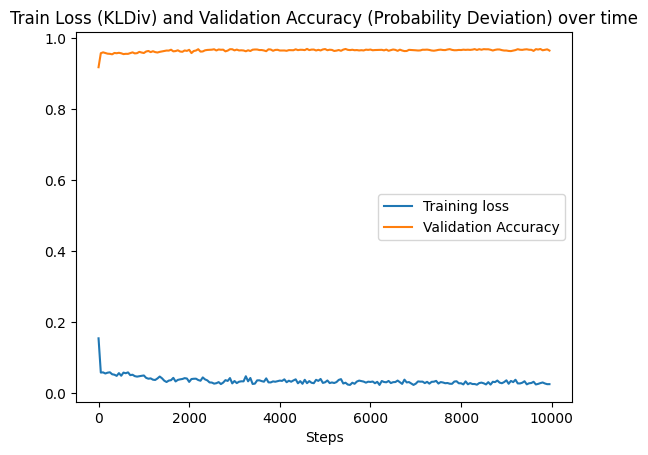

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/score-results-UPDATEMYNAME.csv", skiprows = 1)
plt.plot(data["Num Steps"], data["Train KlDiv"], label = "Training loss")
plt.plot(data["Num Steps"], data["Mean 1-abs(error)"], label = "Validation Accuracy")
plt.legend()
plt.title("Train Loss (KLDiv) and Validation Accuracy (Probability Deviation) over time")
plt.xlabel("Steps")
plt.savefig("trainingfig.png")
plt.show()

In [7]:
import numpy as np
firstrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/first32.csv")
secondrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/second32.csv")
thirdrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/third32.csv")


runs = [firstrun, secondrun, thirdrun]#, fourthrun, fifthrun]
results_summary64 = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[runs[0]["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[runs[0]["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[runs[0]["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[runs[0]["Random_True_Accuracy"][0]],
                               "Upwards_Model_Accuracy":[runs[0]["Upwards_Model_Accuracy"][0]],
                               "Upwards_True_Accuracy":[runs[0]["Upwards_True_Accuracy"][0]],
                               "altUpwards_Model_Accuracy":[runs[0]["altUpwards_Model_Accuracy"][0]],
                               "altUpwards_True_Accuracy":[runs[0]["altUpwards_True_Accuracy"][0]],
                                "mean_uniqueness_model" :[np.mean(runs[0]["Upwards_Model_Uniques"])],
                                "mean_valids_model" : [np.mean(runs[0]["Upwards_Model_Valids"])],
                                "mean_valids_uniques_model" : [np.mean(runs[0]["Upwards_Model_Valids_Uniques"])],
                                "mean_uniqueness_true" : [np.mean(runs[0]["Upwards_True_Uniques"])],
                                "mean_valids_true" : [np.mean(runs[0]["Upwards_True_Valids"])],
                                "mean_valids_uniques_true" : [np.mean(runs[0]["Upwards_True_Valids_Uniques"])]})
                                #"altmean_uniqueness_model" :[np.mean(runs[0]["altUpwards_Model_Uniques"])],
                                #"altmean_valids_model" : [np.mean(runs[0]["altUpwards_Model_Valids"])],
                                #"altmean_valids_uniques_model" : [np.mean(runs[0]["altUpwards_Model_Valids_Uniques"])],
                                #"altmean_uniqueness_true" : [np.mean(runs[0]["altUpwards_True_Uniques"])],
                                #"altmean_valids_true" : [np.mean(runs[0]["altUpwards_True_Valids"])],
                                #"altmean_valids_uniques_true" : [np.mean(runs[0]["altUpwards_True_Valids_Uniques"])]})
for df in runs[1:]:
    extract_data = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[df["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[df["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[df["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[df["Random_True_Accuracy"][0]],
                               "Upwards_Model_Accuracy":[df["Upwards_Model_Accuracy"][0]],
                               "Upwards_True_Accuracy":[df["Upwards_True_Accuracy"][0]],
                               "altUpwards_Model_Accuracy":[df["altUpwards_Model_Accuracy"][0]],
                               "altUpwards_True_Accuracy":[df["altUpwards_True_Accuracy"][0]],
                                "mean_uniqueness_model" :[np.mean(df["Upwards_Model_Uniques"])],
                                "mean_valids_model" : [np.mean(df["Upwards_Model_Valids"])],
                                "mean_valids_uniques_model" : [np.mean(df["Upwards_Model_Valids_Uniques"])],
                                "mean_uniqueness_true" : [np.mean(df["Upwards_True_Uniques"])],
                                "mean_valids_true" : [np.mean(df["Upwards_True_Valids"])],
                                "mean_valids_uniques_true" : [np.mean(df["Upwards_True_Valids_Uniques"])]})
                                #"altmean_uniqueness_model" :[np.mean(df["altUpwards_Model_Uniques"])],
                                #"altmean_valids_model" : [np.mean(df["altUpwards_Model_Valids"])],
                                #"altmean_valids_uniques_model" : [np.mean(df["altUpwards_Model_Valids_Uniques"])],
                                #"altmean_uniqueness_true" : [np.mean(df["altUpwards_True_Uniques"])],
                                #"altmean_valids_true" : [np.mean(df["altUpwards_True_Valids"])],
                                #"altmean_valids_uniques_true" : [np.mean(df["altUpwards_True_Valids_Uniques"])]})
    results_summary64 = pd.concat((results_summary64, extract_data))

print(results_summary64)

   Argmax_Model_Accuracy  Argmax_True_Accuracy  Random_Model_Accuracy  \
0                    0.0              0.234375                    0.0   
0                    0.0              0.234375                    0.0   
0                    0.0              0.281250                    0.0   

   Random_True_Accuracy  Upwards_Model_Accuracy  Upwards_True_Accuracy  \
0                   0.0                     0.0               0.015625   
0                   0.0                     0.0               0.062500   
0                   0.0                     0.0               0.078125   

   altUpwards_Model_Accuracy  altUpwards_True_Accuracy  mean_uniqueness_model  \
0                    0.06250                  0.046875                    1.0   
0                    0.09375                  0.078125                    1.0   
0                    0.03125                  0.078125                    1.0   

   mean_valids_model  mean_valids_uniques_model  mean_uniqueness_true  \
0           

In [8]:
results_summary64.describe()

,Argmax_Model_Accuracy,Argmax_True_Accuracy,Random_Model_Accuracy,Random_True_Accuracy,Upwards_Model_Accuracy,Upwards_True_Accuracy,altUpwards_Model_Accuracy,altUpwards_True_Accuracy,mean_uniqueness_model,mean_valids_model,mean_valids_uniques_model,mean_uniqueness_true,mean_valids_true,mean_valids_uniques_true
count,3.0,3.000000,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.0,3.000000,3.000000
mean,0.0,0.250000,0.0,0.0,0.0,0.052083,0.062500,0.067708,1.0,0.009375,0.009375,1.0,0.048958,0.048958
std,0.0,0.027063,0.0,0.0,0.0,0.032526,0.031250,0.018042,0.0,0.003125,0.003125,0.0,0.017770,0.017770
min,0.0,0.234375,0.0,0.0,0.0,0.015625,0.031250,0.046875,1.0,0.006250,0.006250,1.0,0.034375,0.034375
25%,0.0,0.234375,0.0,0.0,0.0,0.039062,0.046875,0.062500,1.0,0.007812,0.007812,1.0,0.039062,0.039062
50%,0.0,0.234375,0.0,0.0,0.0,0.062500,0.062500,0.078125,1.0,0.009375,0.009375,1.0,0.043750,0.043750
75%,0.0,0.257812,0.0,0.0,0.0,0.070312,0.078125,0.078125,1.0,0.010938,0.010938,1.0,0.056250,0.056250
max,0.0,0.281250,0.0,0.0,0.0,0.078125,0.093750,0.078125,1.0,0.012500,0.012500,1.0,0.068750,0.068750


In [9]:
results_summary64.to_csv("summarised_results64.csv")

In [10]:
"""!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename first5 --test_length 5
!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename second5 --test_length 5
!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename third5 --test_length 5
#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fourth5 --test_length 5
#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fifth5 --test_length 5"""

'!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename first5 --test_length 5\n!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename second5 --test_length 5\n!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename third5 --test_length 5\n#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fourth5 --test_length 5\n#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fifth5 --test_length 5'

In [11]:
"""import numpy as np
firstrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/first5.csv")
secondrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/second5.csv")
thirdrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/third5.csv")
#fourthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fourth5.csv")
#fifthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fifth5.csv")

runs = [firstrun, secondrun, thirdrun]#, fourthrun, fifthrun]
results_summary5 = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[runs[0]["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[runs[0]["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[runs[0]["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[runs[0]["Random_True_Accuracy"][0]],
                               "Upwards_Model_Accuracy":[runs[0]["Upwards_Model_Accuracy"][0]],
                               "Upwards_True_Accuracy":[runs[0]["Upwards_True_Accuracy"][0]],
                               "altUpwards_Model_Accuracy":[runs[0]["altUpwards_Model_Accuracy"][0]],
                               "altUpwards_True_Accuracy":[runs[0]["altUpwards_True_Accuracy"][0]],
                                "mean_uniqueness_model" :[np.mean(runs[0]["Upwards_Model_Uniques"])],
                                "mean_valids_model" : [np.mean(runs[0]["Upwards_Model_Valids"])],
                                "mean_valids_uniques_model" : [np.mean(runs[0]["Upwards_Model_Valids_Uniques"])],
                                "mean_uniqueness_true" : [np.mean(runs[0]["Upwards_True_Uniques"])],
                                "mean_valids_true" : [np.mean(runs[0]["Upwards_True_Valids"])],
                                "mean_valids_uniques_true" : [np.mean(runs[0]["Upwards_True_Valids_Uniques"])],
                                "altmean_uniqueness_model" :[np.mean(runs[0]["altUpwards_Model_Uniques"])],
                                "altmean_valids_model" : [np.mean(runs[0]["altUpwards_Model_Valids"])],
                                "altmean_valids_uniques_model" : [np.mean(runs[0]["altUpwards_Model_Valids_Uniques"])],
                                "altmean_uniqueness_true" : [np.mean(runs[0]["altUpwards_True_Uniques"])],
                                "altmean_valids_true" : [np.mean(runs[0]["altUpwards_True_Valids"])],
                                "altmean_valids_uniques_true" : [np.mean(runs[0]["altUpwards_True_Valids_Uniques"])]})
for df in runs[1:]:
    extract_data = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[df["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[df["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[df["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[df["Random_True_Accuracy"][0]],
                               "Upwards_Model_Accuracy":[df["Upwards_Model_Accuracy"][0]],
                               "Upwards_True_Accuracy":[df["Upwards_True_Accuracy"][0]],
                               "altUpwards_Model_Accuracy":[df["altUpwards_Model_Accuracy"][0]],
                               "altUpwards_True_Accuracy":[df["altUpwards_True_Accuracy"][0]],
                                "mean_uniqueness_model" :[np.mean(df["Upwards_Model_Uniques"])],
                                "mean_valids_model" : [np.mean(df["Upwards_Model_Valids"])],
                                "mean_valids_uniques_model" : [np.mean(df["Upwards_Model_Valids_Uniques"])],
                                "mean_uniqueness_true" : [np.mean(df["Upwards_True_Uniques"])],
                                "mean_valids_true" : [np.mean(df["Upwards_True_Valids"])],
                                "mean_valids_uniques_true" : [np.mean(df["Upwards_True_Valids_Uniques"])],
                                "altmean_uniqueness_model" :[np.mean(df["altUpwards_Model_Uniques"])],
                                "altmean_valids_model" : [np.mean(df["altUpwards_Model_Valids"])],
                                "altmean_valids_uniques_model" : [np.mean(df["altUpwards_Model_Valids_Uniques"])],
                                "altmean_uniqueness_true" : [np.mean(df["altUpwards_True_Uniques"])],
                                "altmean_valids_true" : [np.mean(df["altUpwards_True_Valids"])],
                                "altmean_valids_uniques_true" : [np.mean(df["altUpwards_True_Valids_Uniques"])]})
    results_summary5 = pd.concat((results_summary5, extract_data))

print(results_summary5)"""

'import numpy as np\nfirstrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/first5.csv")\nsecondrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/second5.csv")\nthirdrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/third5.csv")\n#fourthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fourth5.csv")\n#fifthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fifth5.csv")\n\nruns = [firstrun, secondrun, thirdrun]#, fourthrun, fifthrun]\nresults_summary5 = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[runs[0]["Argmax_Model_Accuracy"][0]],\n                                "Argmax_True_Accuracy":[runs[0]["Argmax_True_Accuracy"][0]],\n                                "Random_Model_Accuracy":[runs[0]["Random_Model_Accuracy"][0]],\n                               "Random_True_Accuracy":[runs[0]["Random_True_Accuracy"][0]],\n                               "Upwards_Model_Accuracy":[runs[0]["Upwards_Model_Accuracy"][0]],\n                          

In [12]:
#results_summary5.describe()

In [13]:
#results_summary5.to_csv("summarised_results5.csv")